In [1]:
import utils.mnist_reader as um
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import pandas as pd

In [2]:
x_train_all, y_train_all = um.load_mnist('data/fashion', kind='train')
x_test, y_test = um.load_mnist('data/fashion', kind='t10k')

'''
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img=np.reshape(Xtr[i],(28,28))
    plt.imshow(img,cmap=plt.cm.binary)
plt.show()
'''

#
x_train,x_valid=x_train_all[5000:],x_train_all[:5000]
y_train,y_valid=y_train_all[5000:],y_train_all[:5000]

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(55000, 784)
(55000,)
(5000, 784)
(5000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


In [4]:
def getModel(layers, activations):
    assert len(layers) == len(activations)
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    for i in range(len(layers)):
        model.add(keras.layers.Dense(layers[i],activation=activations[i]))

        #model.add(keras.layers.Dense(10,activation="sigmoid"))
    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])
    return model

all_layers = [[300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 50, 10], [500, 300, 100, 50, 10]]
all_activations = [['relu', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'softmax'], ['relu', 'relu', 'relu', 'sigmoid'], ['relu', 'relu', 'relu', 'softmax'], ['relu', 'softmax', 'relu', 'sigmoid'], ['relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'relu', 'relu', 'sigmoid']]
print(all_layers)
print(all_activations)
print(len(all_layers))
print(len(all_activations))

[[300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 50, 10], [500, 300, 100, 50, 10]]
[['relu', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'softmax'], ['relu', 'relu', 'relu', 'sigmoid'], ['relu', 'relu', 'relu', 'softmax'], ['relu', 'softmax', 'relu', 'sigmoid'], ['relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'relu', 'relu', 'sigmoid']]
8
8


In [5]:
models = []
for i in range(len(all_layers)):
    model = getModel(all_layers[i], all_activations[i])
    models.append(model)
    #model.summary()

In [6]:
for model in models:
    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________

In [7]:
import datetime
def train_model(model):
    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    logdir = os.path.join('logs', current_time)
    output_model=os.path.join(logdir,"fashionmnist_model.h5")
    callbacks=[
        keras.callbacks.TensorBoard(log_dir=logdir),
        keras.callbacks.ModelCheckpoint(output_model,save_best_only=True),
        keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
            ]
    history=model.fit(x_train_scaled,y_train,epochs=30,validation_data=(x_valid_scaled,y_valid),callbacks=callbacks)
    return history

In [8]:
histories = []
accs = []
for model in models:
    history = train_model(model)
    histories.append(history)
    loss,acc=model.evaluate(x_test_scaled,y_test,verbose=0)
    accs.append(acc)
print(acc)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4559 - acc: 0.8323 - val_loss: 0.3875 - val_acc: 0.8584
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3496 - acc: 0.8701 - val_loss: 0.3452 - val_acc: 0.8744
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3154 - acc: 0.8825 - val_loss: 0.3530 - val_acc: 0.8736
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2925 - acc: 0.8905 - val_loss: 0.3256 - val_acc: 0.8854
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2740 - acc: 0.8962 - val_loss: 0.3142 - val_acc: 0.8890
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2548 - acc: 0.9032 - val_loss: 0.3173 - val_acc: 0.8908
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2419 - acc: 0.9092 - val_loss: 0.3109 - val_acc: 0.8874
Epoch 8/30
1719/1719 [==============================] - 7s 4ms

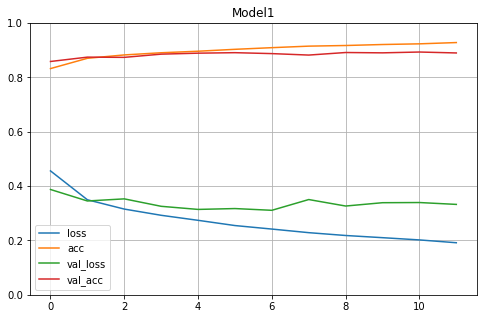

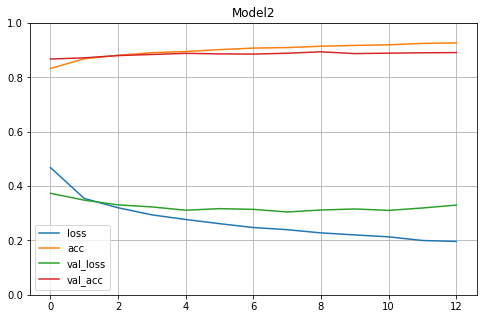

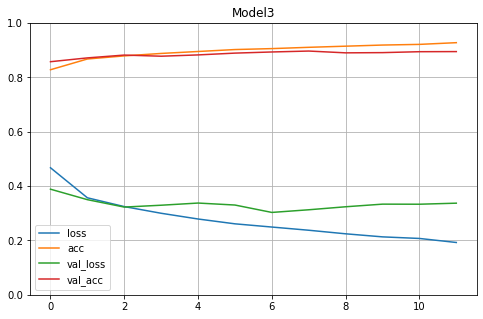

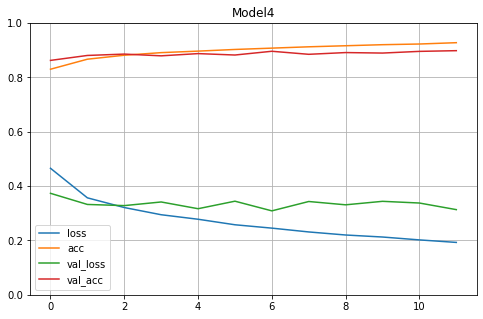

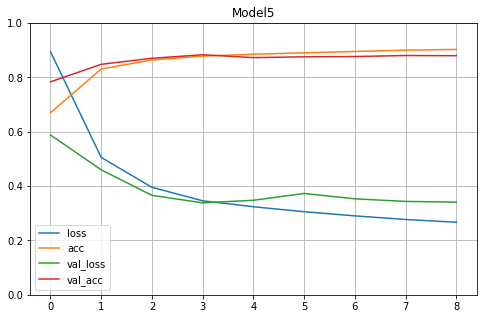

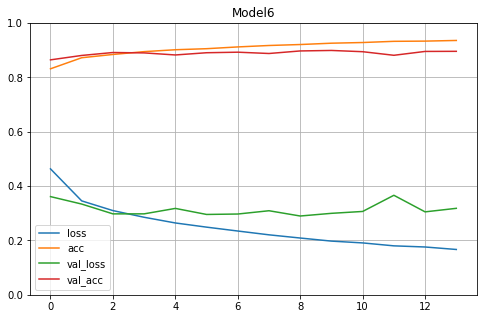

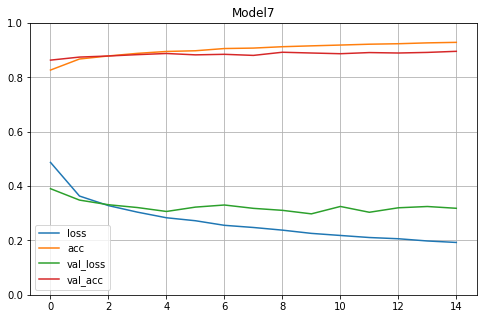

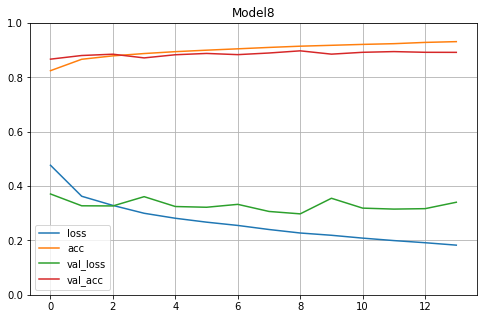

In [9]:
def plot_learning_curves(history, i):
    pd.DataFrame(history.history).plot(figsize=(8,5), title = "Model" + str(i+1))
    plt.grid()
    plt.gca().set_ylim(0,1)
    plt.show()
for i in range(len(histories)):
    plot_learning_curves(histories[i], i)
    plt.show()

============================================

In [10]:
def predictY(model):
    y_pred=model.predict(x_test_scaled)
    predict = np.argmax(y_pred,axis=1) 
    print("predict: {}".format(predict))
    print("y_test: {}".format(y_test))
    #print(y_test)

    aa = [0,0,0,0,0,0,0,0,0,0]
    bb = [0,0,0,0,0,0,0,0,0,0]

    n = 0
    for i in range(len(predict)):
        aa[predict[i]] += 1
        if predict[i] == y_test[i]:
            n += 1
            bb[predict[i]] += 1

    print("aa: {}".format(aa))
    print("bb: {}".format(bb))

    c = []
    for a in range(len(aa)):
        c.append(bb[a]/aa[a])

    print(c)
    return c
    #print(n/len(y_test))
#plt.plot(d,c)

In [11]:
print('=====check=====')
#print('length of result: ' + str(len(result)))
print('length of accs: ' + str(len(accs)))
d = list(range(0,10))

results = []
for i in range(len(models)):
    c = predictY(models[i])
    results.append(c)


=====check=====
length of accs: 8
predict: [9 2 1 ... 8 1 5]
y_test: [9 2 1 ... 8 1 5]
aa: [931, 989, 854, 958, 1237, 981, 1042, 993, 977, 1038]
bb: [792, 975, 727, 874, 898, 954, 721, 944, 953, 971]
[0.8506981740064447, 0.9858442871587462, 0.8512880562060889, 0.9123173277661796, 0.7259498787388844, 0.9724770642201835, 0.6919385796545106, 0.9506545820745217, 0.9754350051177073, 0.9354527938342967]
predict: [9 2 1 ... 8 1 5]
y_test: [9 2 1 ... 8 1 5]
aa: [894, 981, 901, 1102, 1104, 995, 1004, 1074, 1004, 941]
bb: [768, 970, 755, 927, 851, 963, 704, 977, 974, 924]
[0.8590604026845637, 0.9887869520897044, 0.8379578246392897, 0.8411978221415608, 0.7708333333333334, 0.9678391959798995, 0.701195219123506, 0.909683426443203, 0.9701195219123506, 0.9819341126461212]
predict: [9 2 1 ... 8 1 5]
y_test: [9 2 1 ... 8 1 5]
aa: [965, 962, 953, 1047, 1106, 1001, 945, 1004, 1006, 1011]
bb: [810, 959, 789, 913, 858, 965, 678, 946, 963, 959]
[0.8393782383419689, 0.9968814968814969, 0.8279118572927597, 0.

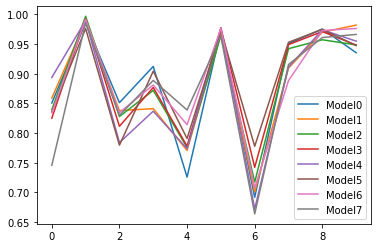

In [12]:

for i in range(len(models)):
    plt.plot(d, results[i], label = 'Model' + str(i))
    
# plt.plot(d, result[1], label = 'model2')
# plt.plot(d, result[2], label = 'model3')
# plt.plot(d, result[3], label = 'model4')
# plt.plot(d, result[4], label = 'model5')
# plt.plot(d, result[5], label = 'model6')
plt.legend()
plt.show()

In [13]:
print(accs)

[0.8809000253677368, 0.8812999725341797, 0.8837000131607056, 0.8876000046730042, 0.8744000196456909, 0.8913000226020813, 0.8865000009536743, 0.8867999911308289]
